In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calmap
from ydata_profiling import ProfileReport

In [2]:
df = pd.read_csv("supermarket_sales.csv")
df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total     Date  \
0       Health and beauty       74.69       7.0  26.1415  548.9715   1/5/19   
1  Electronic accessories       15.28       5.0   3.8200   80.2200   3/8/19   
2      Home and lifestyle       46.33       7.0  16.2155  340.5255   3/3/19   
3       Health and beauty       58.22       8.0  23.2880  489.0480  1/27/19   
4       Sports and travel       86.31       7.0  30.2085  634.3785   2/8/19   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [3]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [4]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')

In [6]:
df.set_index('Date',inplace=True)

In [7]:
df.head()

Invoice ID Branch       City Customer type  Gender  \
Date                                                              
2019-01-05  750-67-8428      A     Yangon        Member  Female   
2019-03-08  226-31-3081      C  Naypyitaw        Normal  Female   
2019-03-03  631-41-3108      A     Yangon        Normal    Male   
2019-01-27  123-19-1176      A     Yangon        Member    Male   
2019-02-08  373-73-7910      A     Yangon        Normal    Male   

                      Product line  Unit price  Quantity   Tax 5%     Total  \
Date                                                                          
2019-01-05       Health and beauty       74.69       7.0  26.1415  548.9715   
2019-03-08  Electronic accessories       15.28       5.0   3.8200   80.2200   
2019-03-03      Home and lifestyle       46.33       7.0  16.2155  340.5255   
2019-01-27       Health and beauty       58.22       8.0  23.2880  489.0480   
2019-02-08       Sports and travel       86.31       7.0  30.2085  634.3785   

             Time      Payment    cogs  gross margin percentage  gross income  \
Date                                                                            
2019-01-05  13:08      Ewallet  522.83                 4.761905       26.1415   
2019-03-08  10:29         Cash   76.40                 4.761905        3.8200   
2019-03-03  13:23  Credit card  324.31                 4.761905       16.2155   
2019-01-27  20:33      Ewallet  465.76                 4.761905       23.2880   
2019-02-08  10:37      Ewallet  604.17                 4.761905       30.2085   

            Rating  
Date                
2019-01-05     9.1  
2019-03-08     9.6  
2019-03-03     7.4  
2019-01-27     8.4  
2019-02-08     5.3

In [8]:
df.describe()

Unit price    Quantity       Tax 5%        Total         cogs  \
count  996.000000  983.000000  1003.000000  1003.000000  1003.000000   
mean    55.764568    5.501526    15.400368   323.407726   308.007358   
std     26.510165    2.924673    11.715192   246.019028   234.303836   
min     10.080000    1.000000     0.508500    10.678500    10.170000   
25%     33.125000    3.000000     5.894750   123.789750   117.895000   
50%     55.420000    5.000000    12.096000   254.016000   241.920000   
75%     78.085000    8.000000    22.539500   473.329500   450.790000   
max     99.960000   10.000000    49.650000  1042.650000   993.000000   

       gross margin percentage  gross income       Rating  
count             1.003000e+03   1003.000000  1003.000000  
mean              4.761905e+00     15.400368     6.972682  
std               6.131488e-14     11.715192     1.717647  
min               4.761905e+00      0.508500     4.000000  
25%               4.761905e+00      5.894750     5.500000  
50%               4.761905e+00     12.096000     7.000000  
75%               4.761905e+00     22.539500     8.500000  
max               4.761905e+00     49.650000    10.000000

# Dealing with missing values and duplicates

In [9]:
df.duplicated().sum()

np.int64(3)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.isna().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  6
Quantity                   19
Tax 5%                      0
Total                       0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

In [12]:
df['Quantity']=df['Quantity'].fillna(df['Quantity'].mean())

In [13]:
df['Unit price']=df['Unit price'].fillna(df['Unit price'].mean())

In [14]:
df['Customer type']=df['Customer type'].fillna(df['Customer type'].mode().iloc[0])

In [15]:
df['Product line']=df['Product line'].fillna(df['Product line'].mode().iloc[0])

In [16]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

# Univariate Analysis

### What does the distribution of customer ratings look like?

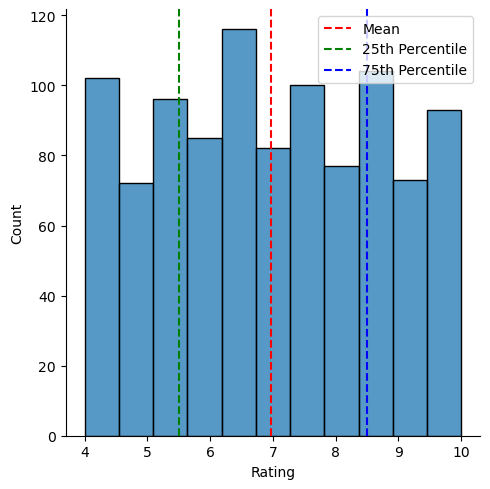

In [17]:
sns.displot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']),c='red',ls='--',label='Mean')
plt.axvline(x=np.percentile(df['Rating'],25),c='green',ls='--',label='25th Percentile')
plt.axvline(x=np.percentile(df['Rating'],75),c='blue',ls='--',label='75th Percentile')
plt.legend()

## Visualising the distribution of all the numerical columns

array([[<Axes: title={'center': 'Unit price'}>,
        <Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Tax 5%'}>],
       [<Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'cogs'}>,
        <Axes: title={'center': 'gross margin percentage'}>],
       [<Axes: title={'center': 'gross income'}>,
        <Axes: title={'center': 'Rating'}>, <Axes: >]], dtype=object)

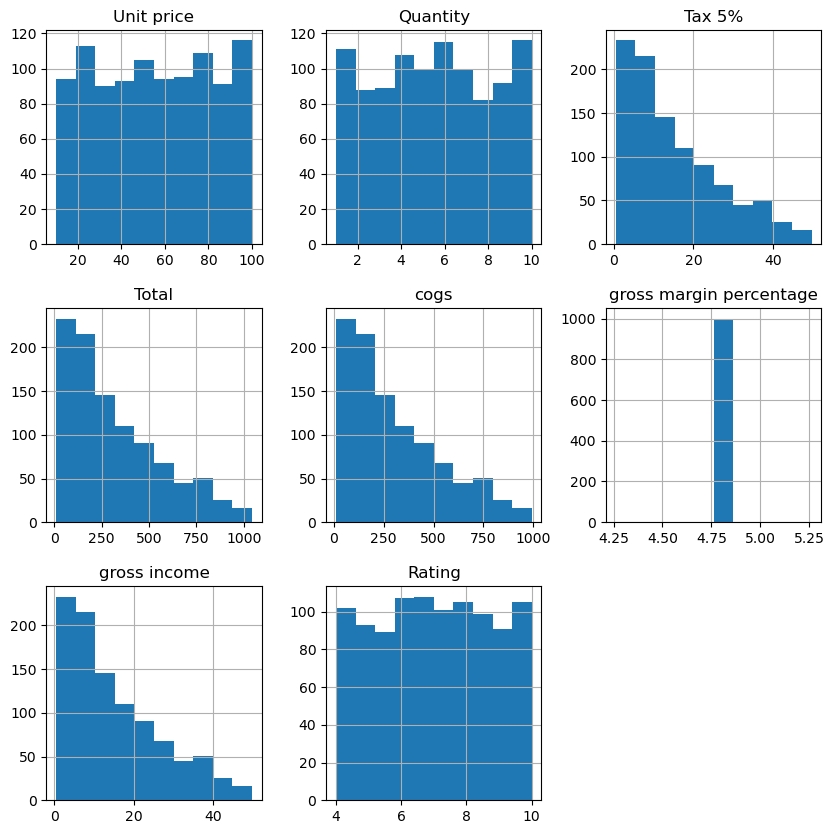

In [18]:
df.hist(figsize=(10,10))

## Analysing aggregate sales number between branches?

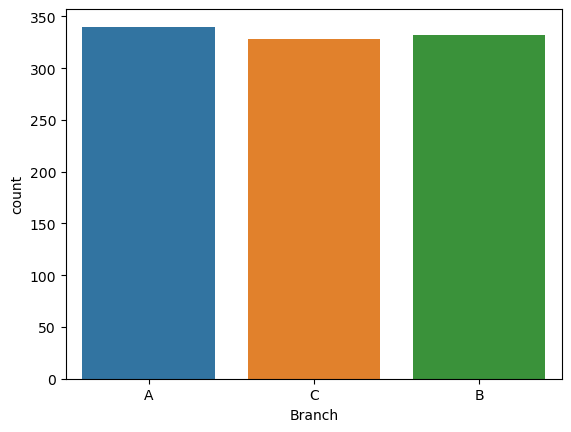

In [19]:
sns.countplot(x='Branch', hue='Branch', data=df)
plt.show()

In [20]:
df['Branch'].value_counts()

Branch
A    340
B    332
C    328
Name: count, dtype: int64

## Analysing the Payment Types

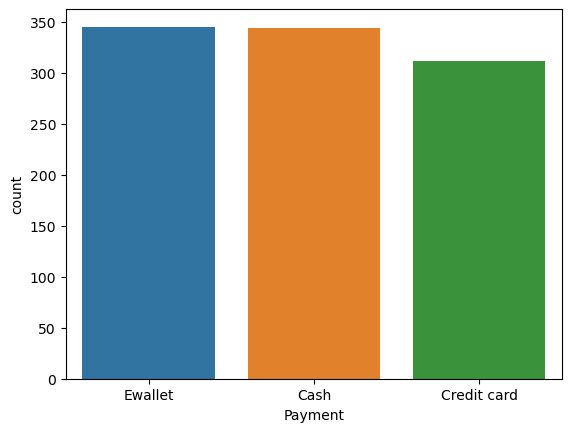

In [21]:
sns.countplot(x='Payment',hue='Payment',data=df)
plt.show()

# Bi variate Analysis

## Is there a relationship between Gross Income and customer rating?

<Axes: xlabel='Rating', ylabel='gross income'>

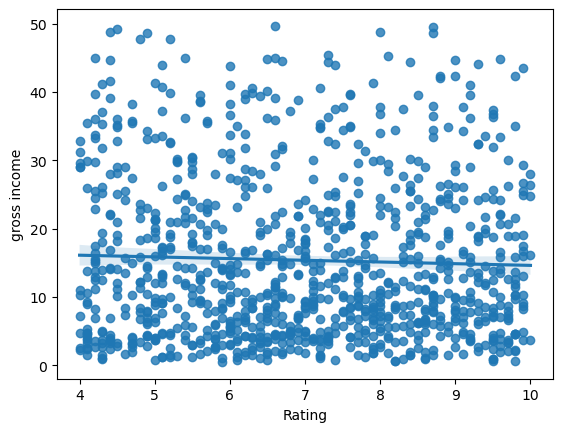

In [22]:
sns.regplot(x='Rating',y="gross income",data=df)

<Axes: xlabel='Branch', ylabel='gross income'>

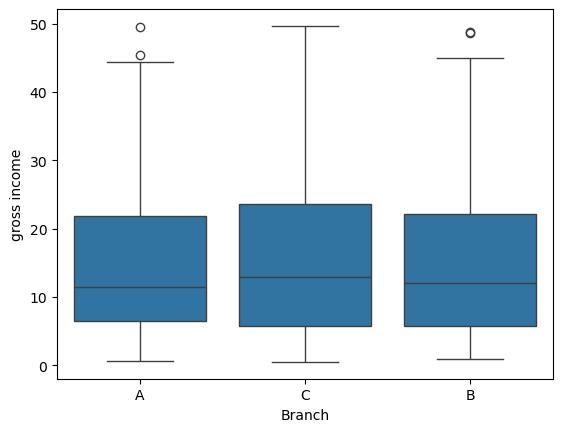

In [23]:
sns.boxplot(x=df['Branch'],y=df['gross income'])

<Axes: xlabel='Gender', ylabel='gross income'>

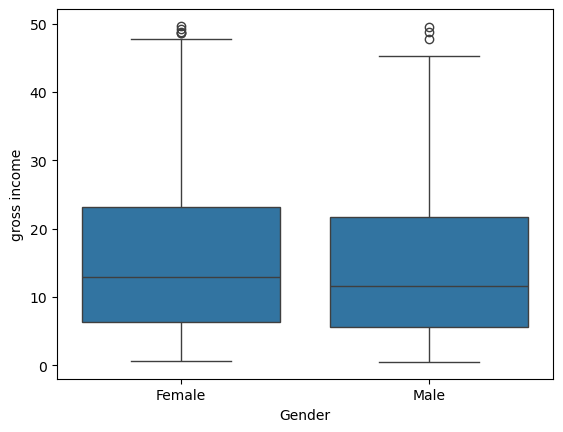

In [24]:
sns.boxplot(x=df['Gender'],y=df['gross income'])

## Is there noticeable time trend in gross income? 

<Axes: xlabel='Date', ylabel='gross income'>

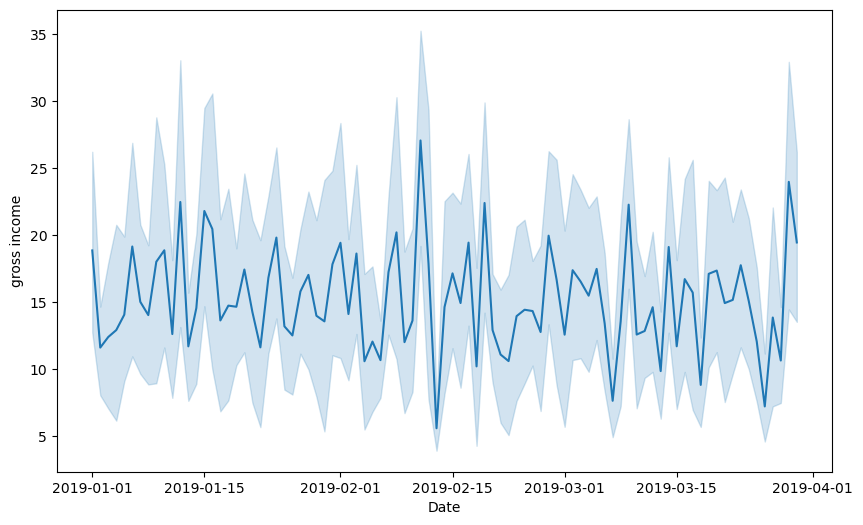

In [28]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df,x=df.index,y=df['gross income'])

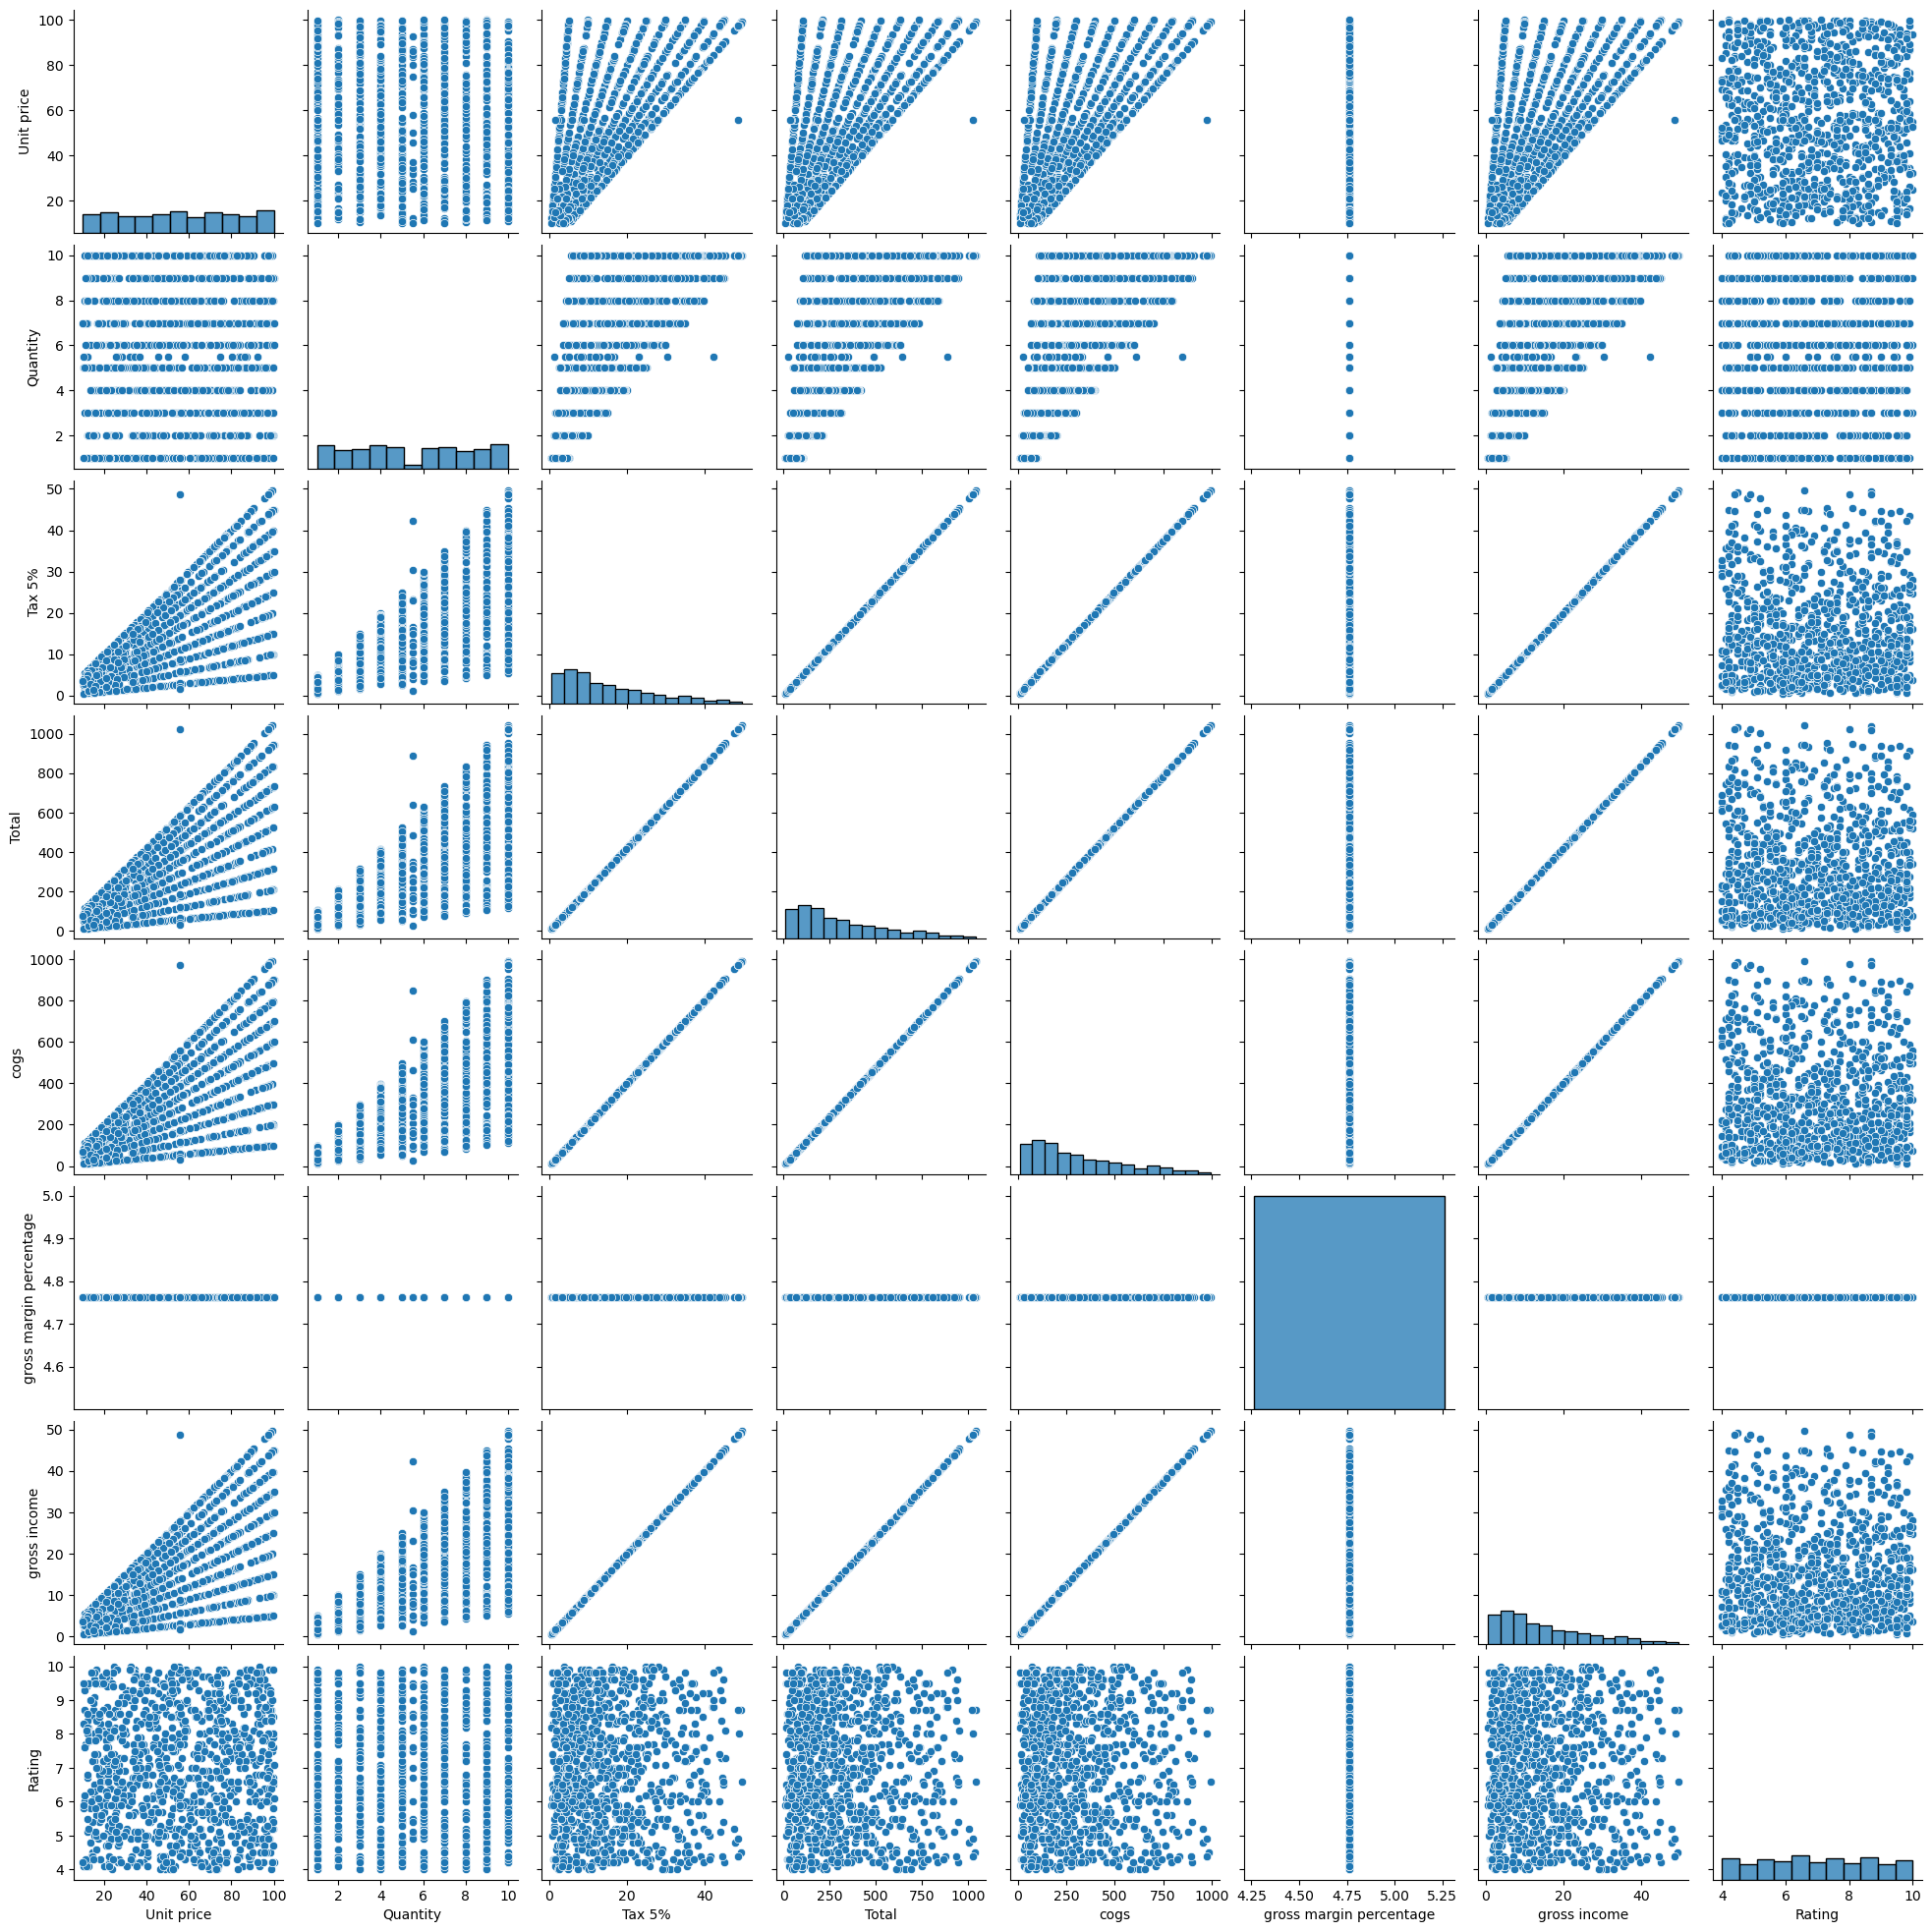

In [29]:
sns.pairplot(df)

# Pandas Profiler for Small Datasets

In [31]:
dataset = pd.read_csv('supermarket_sales.csv')

In [32]:
prof = ProfileReport(dataset)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


%|          | 0/17 [00:00<?, ?it/s]
100%|██████████| 17/17 [00:00<00:00, 59.43it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Correlation Analysis

In [37]:
numeric_cols = df.select_dtypes(include='number')
corr_matrix = round(numeric_cols.corr(),2)
corr_matrix

Unit price  Quantity  Tax 5%  Total  cogs  \
Unit price                     1.00      0.01    0.63   0.63  0.63   
Quantity                       0.01      1.00    0.70   0.70  0.70   
Tax 5%                         0.63      0.70    1.00   1.00  1.00   
Total                          0.63      0.70    1.00   1.00  1.00   
cogs                           0.63      0.70    1.00   1.00  1.00   
gross margin percentage         NaN       NaN     NaN    NaN   NaN   
gross income                   0.63      0.70    1.00   1.00  1.00   
Rating                        -0.01     -0.02   -0.04  -0.04 -0.04   

                         gross margin percentage  gross income  Rating  
Unit price                                   NaN          0.63   -0.01  
Quantity                                     NaN          0.70   -0.02  
Tax 5%                                       NaN          1.00   -0.04  
Total                                        NaN          1.00   -0.04  
cogs                                         NaN          1.00   -0.04  
gross margin percentage                      NaN           NaN     NaN  
gross income                                 NaN          1.00   -0.04  
Rating                                       NaN         -0.04    1.00

<Axes: >

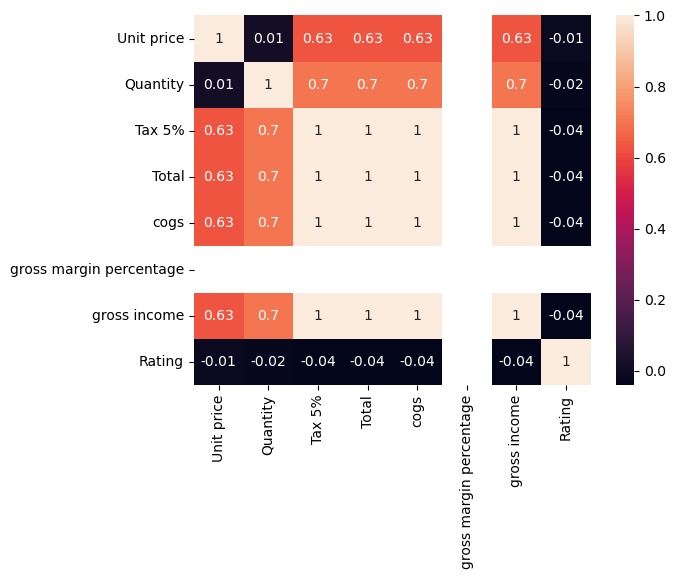

In [39]:
sns.heatmap(corr_matrix,annot=True)